## Import

In [18]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


In [11]:
data = pd.read_csv('Processed_dataset.csv', index_col=0)

In [12]:
data

,score,num_labels,above_ground,access_to_exterior,aggregate_floor,arched_cabinets,arched_walkways,attached_garage,awning,backsplash,...,wall_mounted_ac,washer__dryer,water_heater,water_ice_dispenser,water_view,white,white_cabinets,wood_ceiling,wood_stove,wood_wall
1,3.5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3.4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3591,3.4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3592,3.8,12,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3594,4.5,15,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [13]:
y=data['score']
X=data.drop('score',axis=1)

In [14]:
# Divisió de les dades en conjunts d'entrenament i prova (80% entrenament, 20% prova)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.4679306459321263
R2 Score: 0.16997394158568835


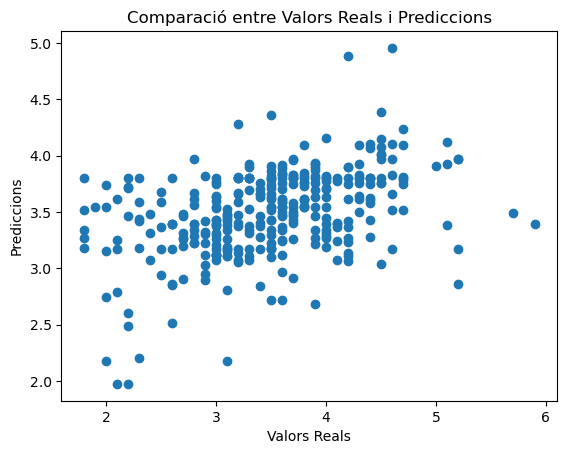

In [15]:
# Genera dades de mostra per a l'exemple (pots substituir això per les teves pròpies dades)
#X, y = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)

# Divideix les dades en conjunts d'entrenament i de prova
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialitza el regressor Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrena el model
rf_regressor.fit(X_train, y_train)

# Prediu amb les dades de prova
y_pred = rf_regressor.predict(X_test)

# Avalua el model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualitza la comparació entre les prediccions i les dades reals
plt.scatter(y_test, y_pred)
plt.xlabel("Valors Reals")
plt.ylabel("Prediccions")
plt.title("Comparació entre Valors Reals i Prediccions")
plt.show()


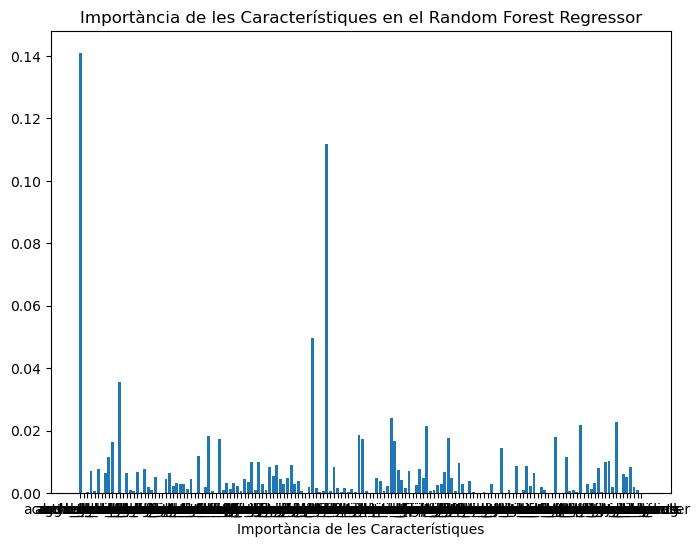

In [16]:
# Després d'haver entrenat el model Random Forest, pots obtenir la importància de les característiques
feature_importance = rf_regressor.feature_importances_

# Obté els noms de les característiques o atributs
feature_names = data.columns[1:]  # Canvia això amb els noms reals de les teves característiques

# Visualitza la importància de les característiques
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance, align='center')
plt.xlabel('Importància de les Característiques')
plt.title('Importància de les Característiques en el Random Forest Regressor')
plt.show()


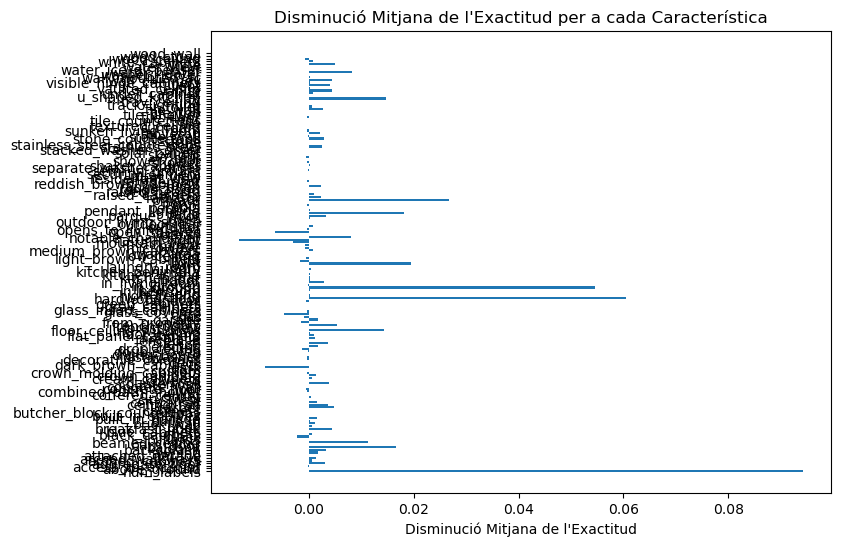

In [19]:
# Calcula la importància de les característiques utilitzant la permutació
result = permutation_importance(rf_regressor, X_test, y_test, n_repeats=10, random_state=42)

# Obté els valors de la disminució mitjana de l'exactitud per a cada característica
mean_accuracy_decrease = result.importances_mean

# Visualitza la disminució mitjana de l'exactitud per a cada característica
plt.figure(figsize=(8, 6))
plt.barh(feature_names, mean_accuracy_decrease, align='center')
plt.xlabel('Disminució Mitjana de l\'Exactitud')
plt.title('Disminució Mitjana de l\'Exactitud per a cada Característica')
plt.show()

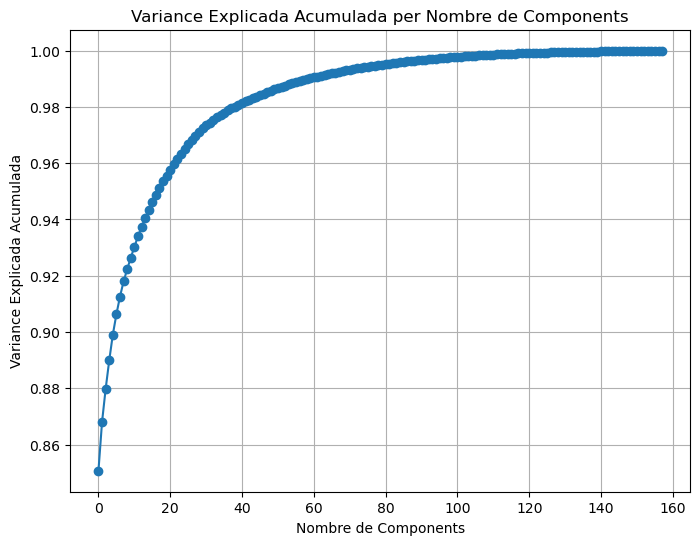

In [21]:
from sklearn.decomposition import PCA
import numpy as np

# Inicialitza PCA
pca = PCA()

# Ajusta PCA als teus dades
pca.fit(X)

# Nombre òptim de components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualitza la variança explicada acumulada per nombre de components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Nombre de Components')
plt.ylabel('Variance Explicada Acumulada')
plt.title('Variance Explicada Acumulada per Nombre de Components')
plt.grid(True)
plt.show()


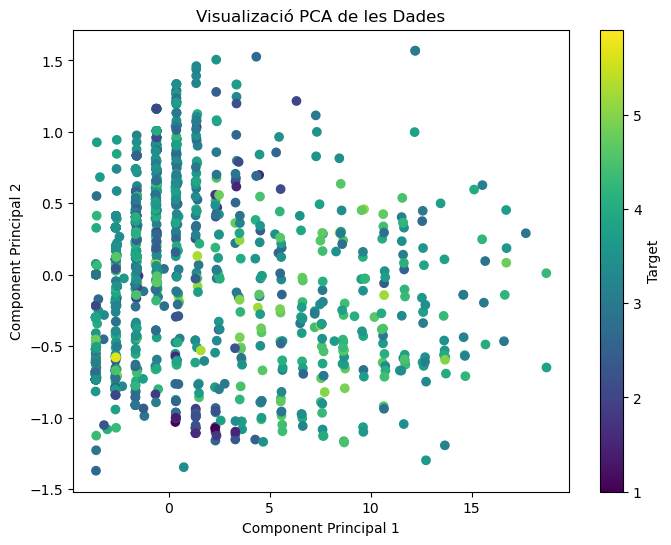

In [22]:
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Inicializa i ajusta PCA amb dos components principals 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualiza les dades reducïdes per la PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.title('Visualizació PCA de les Dades')
plt.colorbar(label='Target')
plt.show()
